In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests 
import json
import http.client 


In [34]:
#Attom API was to expensive and I kept maxing out my free trial calls so Moving on to Dowladed excell data from zillow
#https://www.zillow.com/research/data/
prop_value = pd.read_csv('data/Zillow_county_values.csv')
election = pd.read_csv('data/county_election.csv')
employment = pd.read_csv('data/county_employment.csv')
employment

,COUNTYNAME,EMPLOYED,UNEMPLOYED,TOTAL_WORKFORCE,RATE
0,Adams,"265,608","7,743","273,351",2.8
1,Alamosa,"8,201",288,"8,489",3.4
2,Arapahoe,"355,291","9,529","364,820",2.6
3,Archuleta,"6,692",209,"6,901",3.0
4,Baca,"2,121",35,"2,156",1.6
...,...,...,...,...,...
59,Summit,"22,554",398,"22,952",1.7
60,Teller,"12,409",379,"12,788",3.0
61,Washington,"2,920",56,"2,976",1.9
62,Weld,"165,049","4,204","169,253",2.5


In [4]:
co_prop = prop_value[prop_value['State'] == 'CO']
clean_co_prop = co_prop.drop(labels = ['RegionID', 'StateName', 'StateCodeFIPS', 'MunicipalCodeFIPS','SizeRank', 'RegionType','Metro','State'], axis = 1)

In [5]:
clean_co_prop['2019_MEAN_VALUE'] = clean_co_prop.mean(axis=1)

In [6]:
clean_co_prop.to_csv(path_or_buf = 'Data/county_property.csv')

In [7]:
clean_co_prop

,RegionName,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,2019_MEAN_VALUE
98,El Paso County,303131,304905,305748,306168,306778,308320,310588,313299,316080,318008,318753,319659,310953.083333
105,Denver County,466591,466551,465246,464257,463587,464245,464961,466195,466912,466595,465962,466612,465642.833333
108,Arapahoe County,399756,400997,403027,404756,405249,405452,406049,405766,406181,405885,407303,409092,404959.416667
118,Jefferson County,456781,458267,460072,461860,462117,463420,464410,465641,465802,466541,466356,468202,463289.083333
147,Adams County,373957,374331,373930,374020,373124,373849,374562,375452,375606,376107,376611,377881,374952.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,Kiowa County,89563,89834,90399,91275,92239,92765,93205,93622,94113,94611,95255,95876,92729.750000
2854,Jackson County,176166,174604,172097,171196,170697,171194,172110,173352,174570,174976,174133,173828,173243.583333
2858,Hinsdale County,325721,323556,321396,322698,322741,323029,321214,320879,320602,321351,321197,321058,322120.166667
2859,Mineral County,279124,280034,280726,281178,281450,281853,282887,283881,284527,283708,282972,282354,282057.833333


In [8]:
election['county'] = election['county'] +' '+ 'County'
election

,county,candidate,party,candidatevotes,totalvotes
0,Adams County,Hillary Clinton,democrat,96558,193665
1,Adams County,Donald Trump,republican,80082,193665
2,Adams County,Other,other,17025,193665
3,Alamosa County,Hillary Clinton,democrat,3189,6939
4,Alamosa County,Donald Trump,republican,3046,6939
...,...,...,...,...,...
187,Weld County,Donald Trump,republican,76651,135428
188,Weld County,Other,other,12258,135428
189,Yuma County,Hillary Clinton,democrat,726,4791
190,Yuma County,Donald Trump,republican,3850,4791


<IPython.core.display.Javascript object>


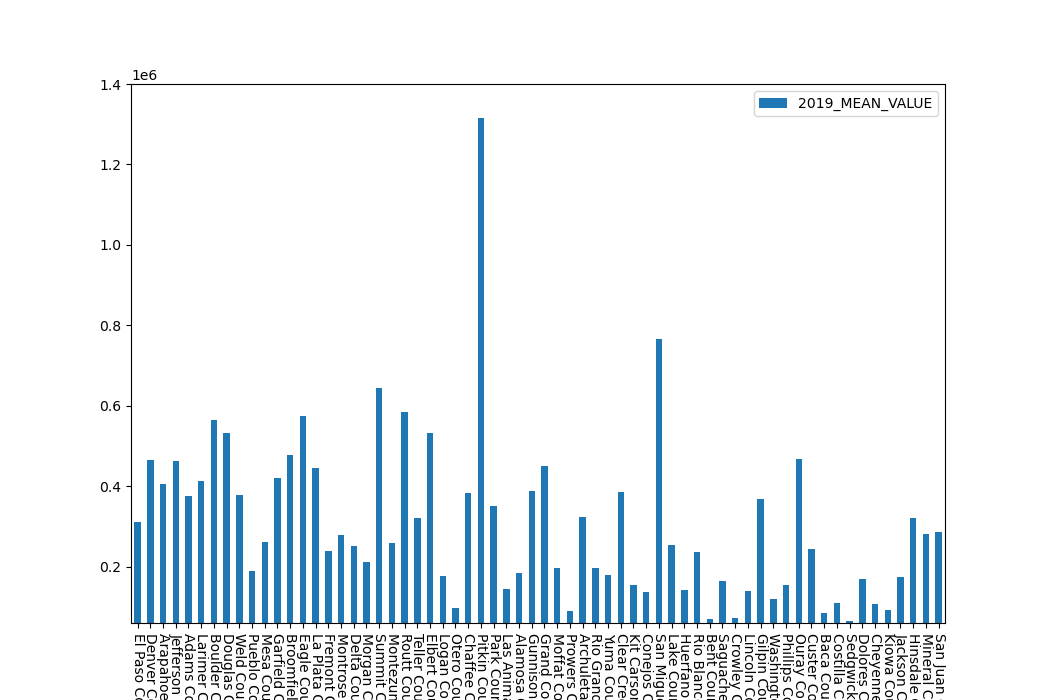

In [18]:
clean_co_prop.plot.bar(x = 'RegionName', y = '2019_MEAN_VALUE', figsize=(10.5,7))
plt.xticks(rotation = 270)
plt.ylim([60000, 1400000]);

<IPython.core.display.Javascript object>


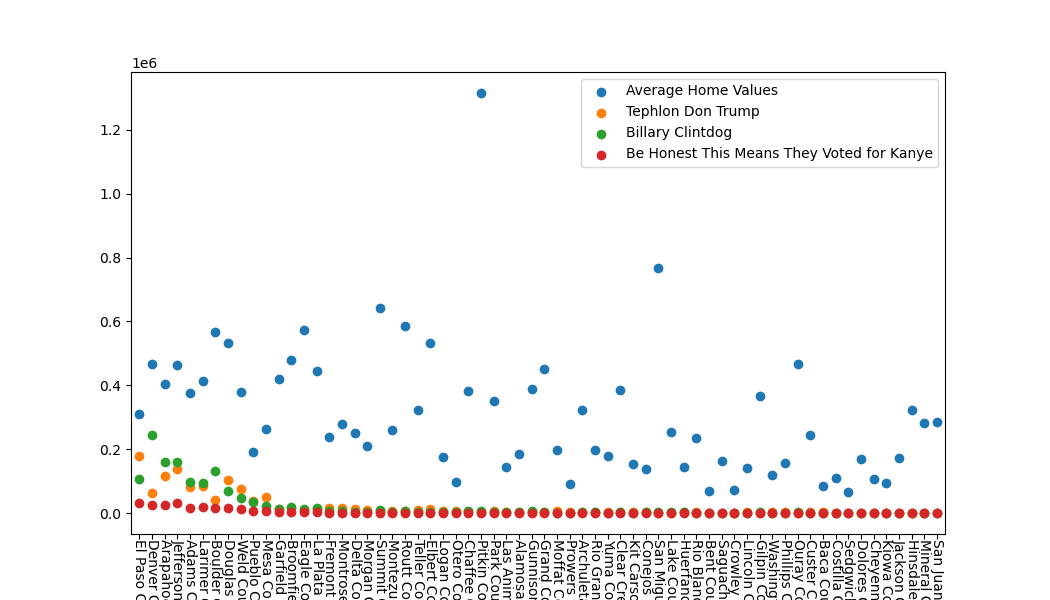

In [28]:
old_bois = election[election['party'] == 'republican']
libs = election[election['party'] == 'democrat']
other = election[election['party'] == 'other']

fig, ax = plt.subplots(figsize=(10.5, 6))
p1 = ax.scatter(clean_co_prop['RegionName'], clean_co_prop['2019_MEAN_VALUE'], label='Average Home Values')
p2 = ax.scatter(old_bois['county'],old_bois['candidatevotes'],label='Tephlon Don Trump')
p3 = ax.scatter(libs['county'], libs['candidatevotes'], label='Billary Clintdog')
p4 = ax.scatter(other['county'], other['candidatevotes'], label='Be Honest This Means They Voted for Kanye')

plt.xticks(rotation = 270)

plt.margins(x=0.01)
ax.xaxis.set_tick_params(pad=0)
plt.legend()
plt.show();


In [36]:
employment['COUNTYNAME'] = employment['COUNTYNAME'] + ' ' + 'County'

<IPython.core.display.Javascript object>


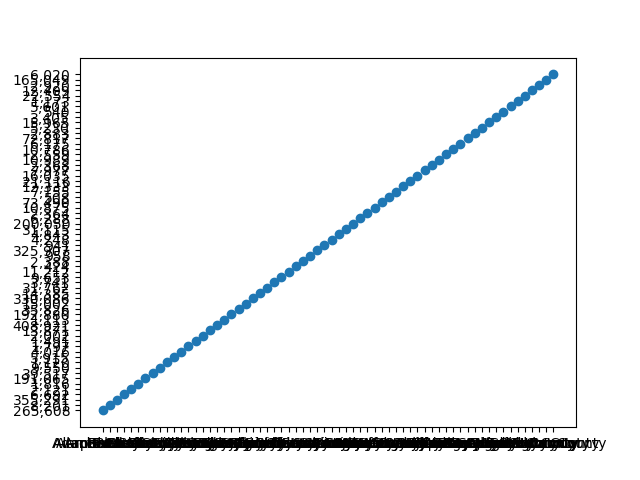

In [45]:
fig, ax = plt.subplots()
p1 = ax.scatter(employment['COUNTYNAME'], employment['EMPLOYED'])

In [39]:
employment

,COUNTYNAME,EMPLOYED,UNEMPLOYED,TOTAL_WORKFORCE,RATE
0,Adams County,"265,608","7,743","273,351",2.8
1,Alamosa County,"8,201",288,"8,489",3.4
2,Arapahoe County,"355,291","9,529","364,820",2.6
3,Archuleta County,"6,692",209,"6,901",3.0
4,Baca County,"2,121",35,"2,156",1.6
...,...,...,...,...,...
59,Summit County,"22,554",398,"22,952",1.7
60,Teller County,"12,409",379,"12,788",3.0
61,Washington County,"2,920",56,"2,976",1.9
62,Weld County,"165,049","4,204","169,253",2.5
